## Beginning, info data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:>

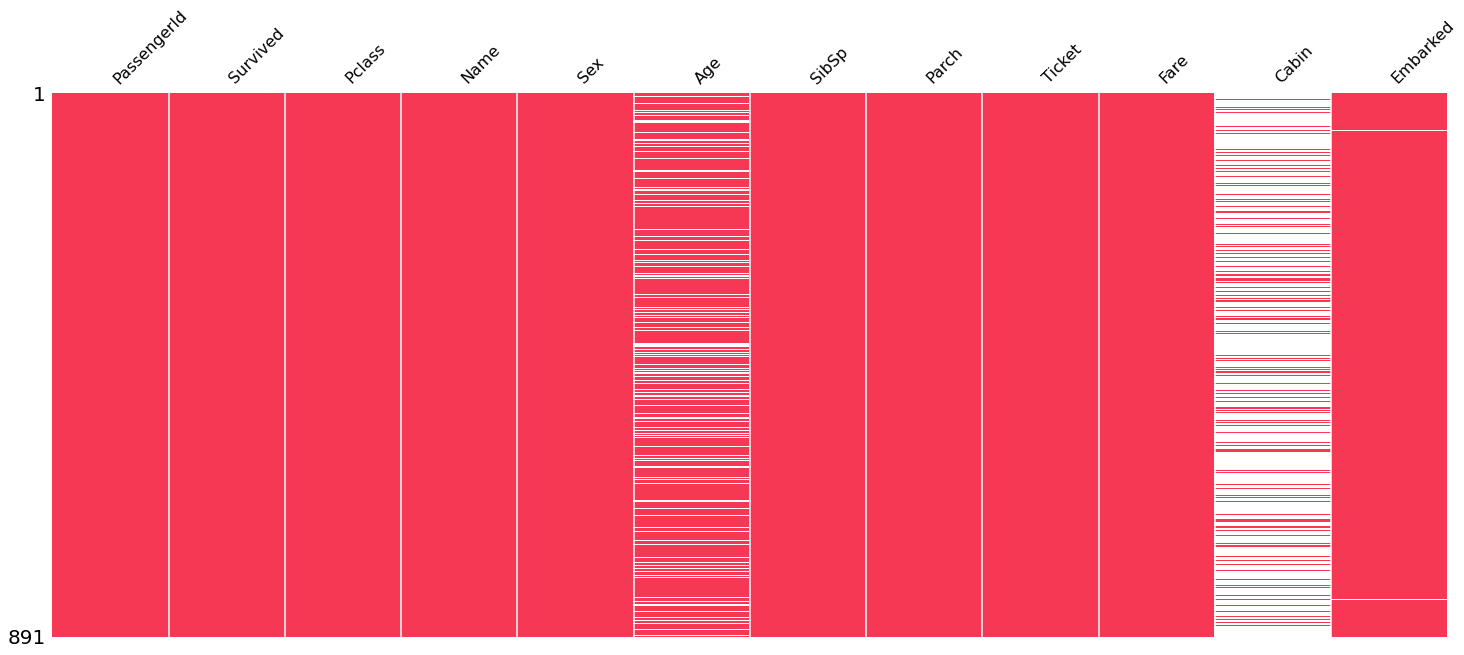

In [48]:
msn.matrix(df, color=(0.97, 0.22, 0.33), sparkline=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

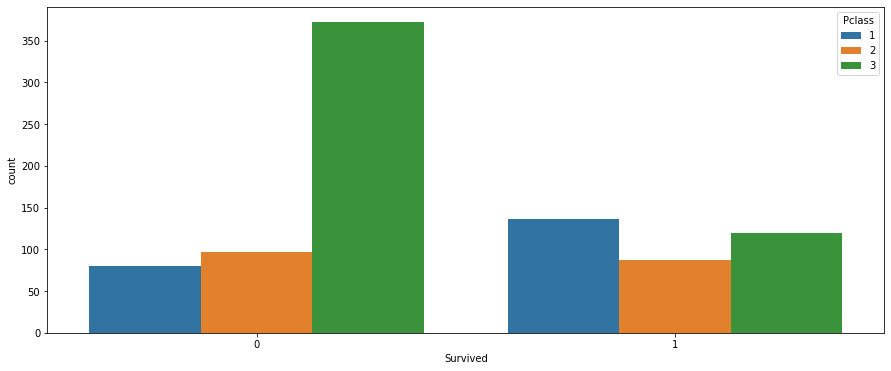

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Survived', data = df, hue='Pclass')

## Age

<AxesSubplot:xlabel='Age', ylabel='count'>

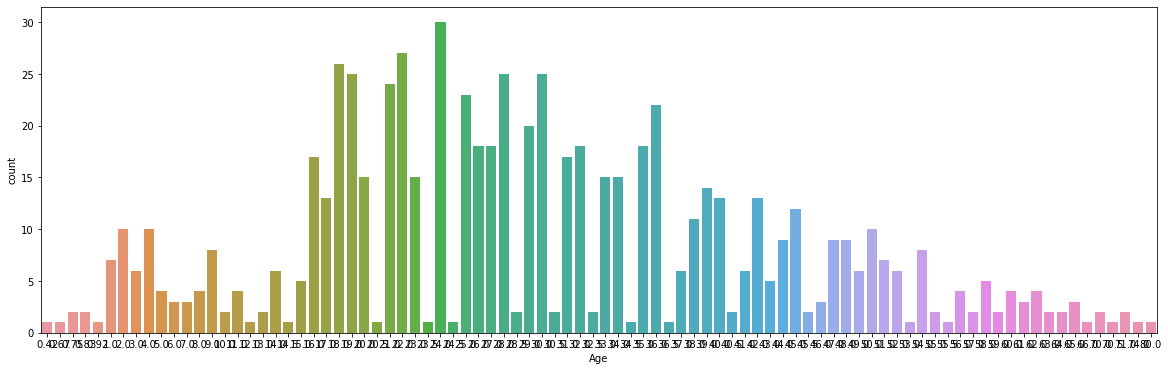

In [46]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'Age', data = df)

In [13]:
def fill_age(df):
    df['Age'].fillna(df['Age'].median(), inplace= True)
    return df

In [62]:
fill_age(df)

,PassengerId,Survived,Pclass,Age,Fare,Embarked,if_male,type_of_title,with_without_family
0,1,0,3,22.0,7.2500,1.0,1,1,1
1,2,1,1,38.0,71.2833,2.0,0,3,1
2,3,1,3,26.0,7.9250,1.0,0,2,0
3,4,1,1,35.0,53.1000,1.0,0,3,1
4,5,0,3,35.0,8.0500,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,1.0,1,0,0
887,888,1,1,19.0,30.0000,1.0,0,2,0
888,889,0,3,28.0,23.4500,1.0,0,2,1
889,890,1,1,26.0,30.0000,2.0,1,1,0


In [63]:
df.corr()['Survived']

PassengerId           -0.005007
Survived               1.000000
Pclass                -0.338481
Age                   -0.064910
Fare                   0.257307
Embarked               0.106811
if_male               -0.543351
type_of_title          0.451099
with_without_family    0.203367
Name: Survived, dtype: float64

## Sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

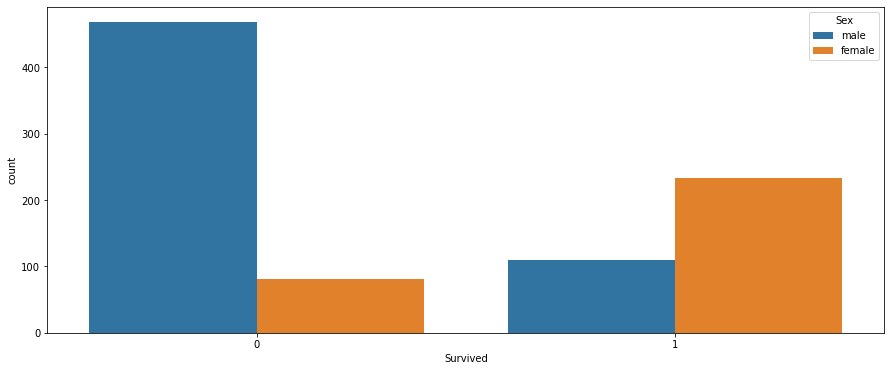

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Survived', data = df, hue='Sex')

In [5]:
def change_sex(df):
    df['if_male'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    df.drop('Sex', inplace = True, axis = 1)
    return df

In [6]:
change_sex(df)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,if_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


## Embarked

<AxesSubplot:xlabel='Survived', ylabel='count'>

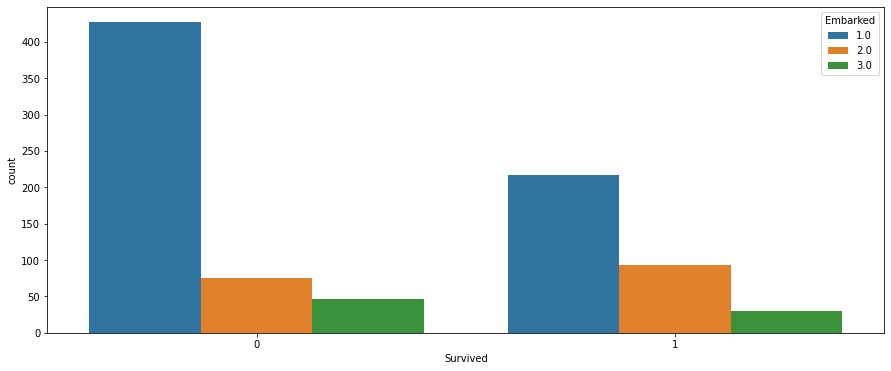

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Survived', data = df, hue='Embarked')

In [13]:
df['Embarked'].isnull().sum()

0

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
def embarked(df):
    df['Embarked'].replace(['S','C','Q'], [1,2,3], inplace = True)
    df['Embarked'].fillna(1, inplace = True)
    return df

In [11]:
embarked(df)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,if_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2.0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1.0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,2.0,1


## Fare

<AxesSubplot:xlabel='Fare', ylabel='PassengerId'>

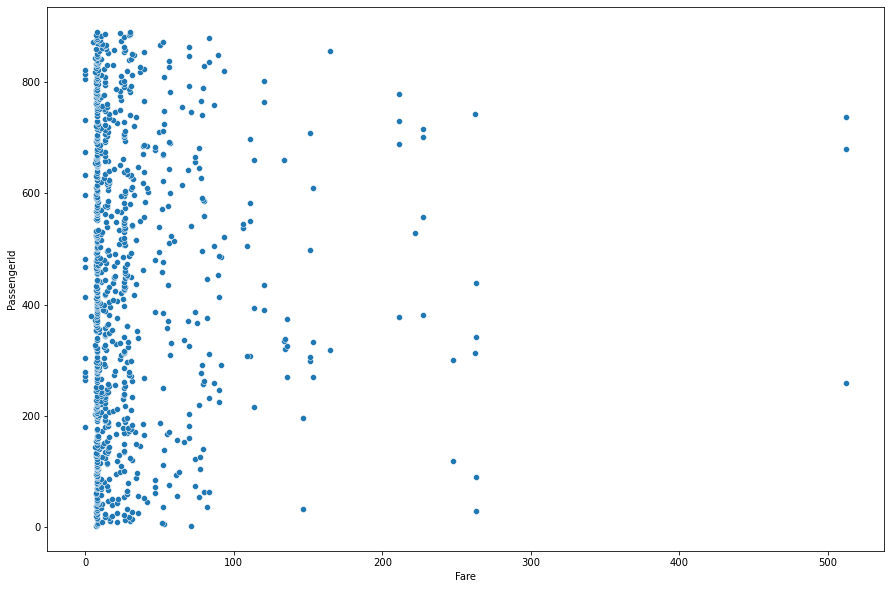

In [68]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = df['Fare'], y = df['PassengerId'])

In [69]:
df_process = df.copy()

In [94]:
df_process.drop(df_process[df_process['Fare'] > 400].index, inplace=True)

<AxesSubplot:xlabel='Fare', ylabel='PassengerId'>

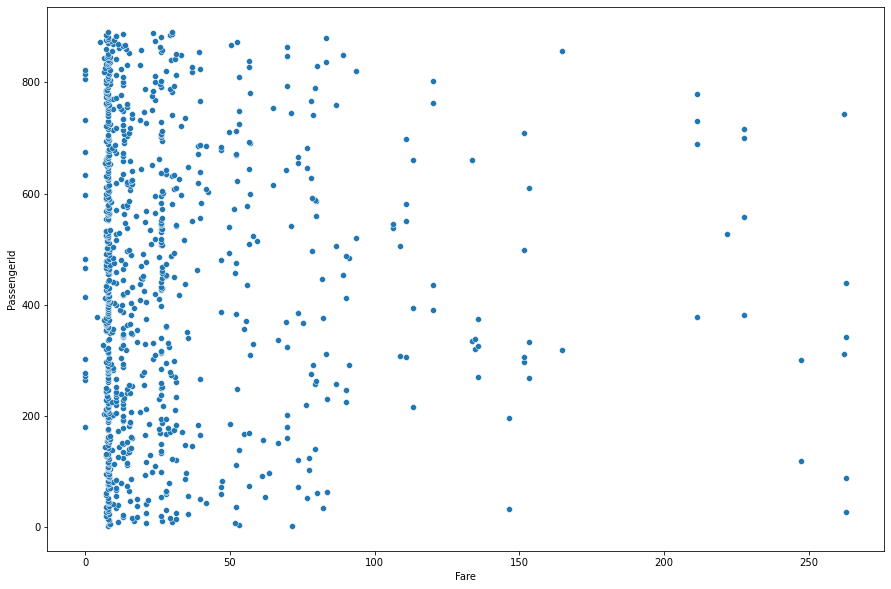

In [96]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = df_process['Fare'], y = df_process['PassengerId'])

In [107]:
meee = df_process['Fare'].std()

In [131]:
df_process['fare_mean'] = df_process['Fare'].apply(lambda x: 0 if x < meee else 1)

In [132]:
df_process['fare_mean'].value_counts()

0    715
1    172
Name: fare_mean, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

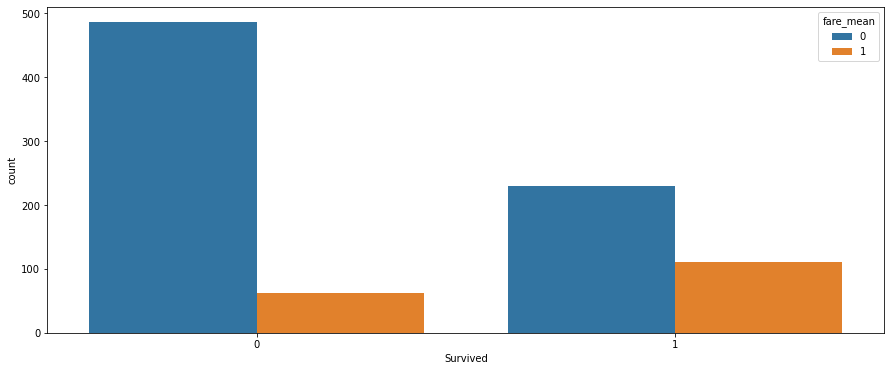

In [133]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Survived', data = df_process, hue='fare_mean')

In [134]:
df_process.corr()['Survived']

PassengerId   -0.008465
Survived       1.000000
Pclass        -0.333582
Age           -0.080138
SibSp         -0.033028
Parch          0.081776
Fare           0.261378
Embarked       0.102517
if_male       -0.545603
fare_mean      0.259756
Name: Survived, dtype: float64

## Name

In [223]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,2memb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [221]:
df['Name'][1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [222]:
df[['Surname','2memb']]=df['Name'].str.split(',',expand=True).apply(lambda x: x.str.strip())

In [146]:
df['prefix'] = [str(row.split(".")[0].split()[-1]) if row else None for row in df["2memb"]]

In [151]:
df[['Name','Surname', '2memb', 'prefix']].head(10)

,Name,Surname,2memb,prefix
0,"Braund, Mr. Owen Harris",Braund,Mr. Owen Harris,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,"Heikkinen, Miss. Laina",Heikkinen,Miss. Laina,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs
4,"Allen, Mr. William Henry",Allen,Mr. William Henry,Mr
5,"Moran, Mr. James",Moran,Mr. James,Mr
6,"McCarthy, Mr. Timothy J",McCarthy,Mr. Timothy J,Mr
7,"Palsson, Master. Gosta Leonard",Palsson,Master. Gosta Leonard,Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Nasser,Mrs. Nicholas (Adele Achem),Mrs


<AxesSubplot:xlabel='prefix', ylabel='count'>

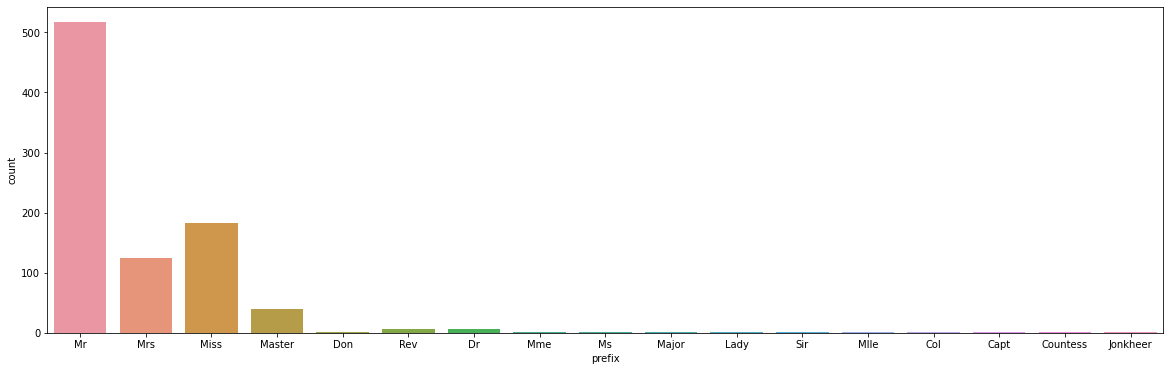

In [157]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'prefix', data = df)

In [152]:
df['prefix'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Lady          1
Jonkheer      1
Capt          1
Countess      1
Ms            1
Don           1
Sir           1
Name: prefix, dtype: int64

In [158]:
df[df['prefix'] == 'Col']

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,if_male,Surname,2memb,prefix
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",56.0,0,0,13213,35.50,A26,2.0,1,Simonius-Blumer,Col. Oberst Alfons,Col
694,695,0,1,"Weir, Col. John",60.0,0,0,113800,26.55,NaN,1.0,1,Weir,Col. John,Col


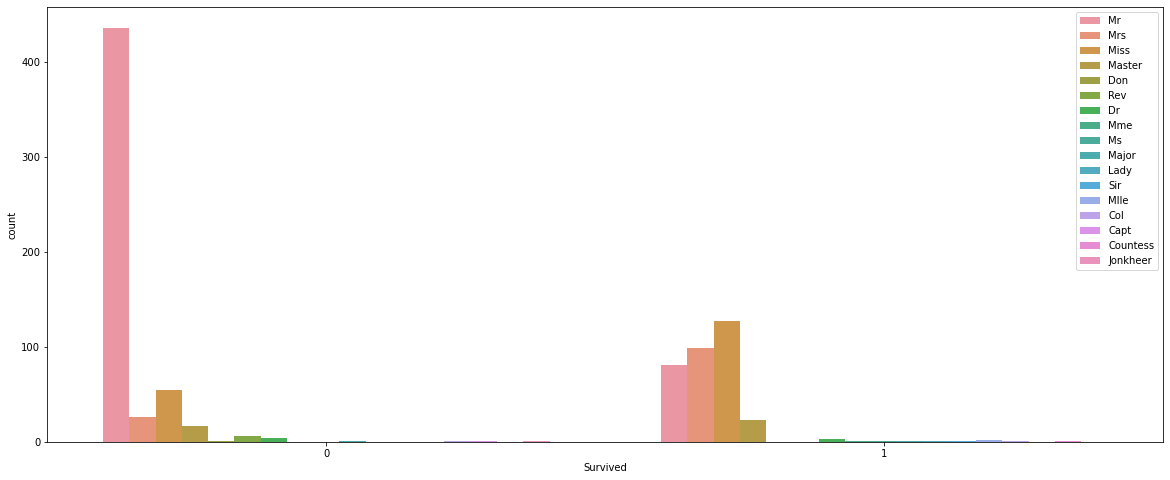

In [159]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Survived', data = df, hue = 'prefix')
plt.legend(loc='upper right')

In [160]:
# stan cywily: Rev - wielebny, Mr -pan, Miss - panna, Mrs - mężatka, Ms - pani(nieznana), Mlle = Ms/Miss, Mme - Madame (Mrs), Master - niepełnoletni
# tytuł zawodowy: Dr - doktor,
# wojsko: Col - pułkownik, Major - major, Capt - kapitan, 
# szlachta (nobility): Don - członek rodziny królewskiej/szlachta/mafia (hehe), Sir - sir, Countess - Hrabina, Lady - lady, Jonkheer - szlachta

In [161]:
df['type_of_title'] = df['prefix'].replace(['Dr', 'Rev','Col', 'Major', 'Mlle', 
                                   'Mme', 'Don', 'Sir', 'Countess', 'Ms', 'Lady', 'Capt', 'Jonkheer'],'with_title')
df['type_of_title'] = df['type_of_title'].map({'with_title': 0,'Mr': 1, "Miss": 2, "Mrs": 3, "Master": 4})

<AxesSubplot:xlabel='type_of_title', ylabel='count'>

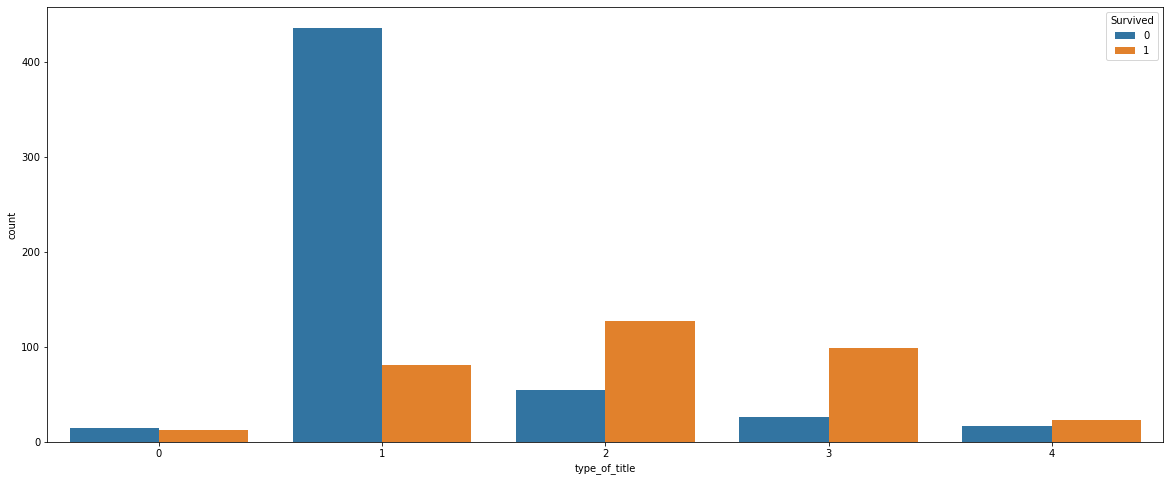

In [163]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'type_of_title', data = df, hue = 'Survived')

In [164]:
df.corr()['Survived']

PassengerId     -0.005007
Survived         1.000000
Pclass          -0.338481
Age             -0.077221
SibSp           -0.035322
Parch            0.081629
Fare             0.257307
Embarked         0.106811
if_male         -0.543351
type_of_title    0.451099
Name: Survived, dtype: float64

In [181]:
df.drop(['Name', 'Surname', '2memb', 'prefix'], axis = 1, inplace = True)


In [7]:
def name_title(df):
    df[['Surname','2memb']]=df['Name'].str.split(',',expand=True).apply(lambda x: x.str.strip())
    df['prefix'] = [str(row.split(".")[0].split()[-1]) if row else None for row in df["2memb"]]

    # stan cywily: Rev - wielebny, Mr -pan, Miss - panna, Dona - pani, Mrs - mężatka, Ms - pani(nieznana), Mlle = Ms/Miss, Mme - Madame (Mrs), Master - niepełnoletni
    # tytuł zawodowy: Dr - doktor,
    # wojsko: Col - pułkownik, Major - major, Capt - kapitan, 
    # szlachta (nobility): Don - członek rodziny królewskiej/szlachta/mafia (hehe), Sir - sir, Countess - Hrabina, Lady - lady, Jonkheer - szlachta

    df['type_of_title'] = df['prefix'].replace(['Dr', 'Rev','Col', 'Major', 'Mlle', 
                                   'Mme', 'Don', 'Sir', 'Countess', 'Ms', 'Lady', 'Capt', 'Jonkheer'],'with_title')
    df['type_of_title'] = df['type_of_title'].map({'with_title': 0,'Mr': 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dona": 5})

    df.drop(['Name', 'Surname', '2memb', 'prefix'], axis = 1, inplace = True)

    return df

In [16]:
name_title(df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,if_male,type_of_title
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,2.0,0,3
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0,2
3,4,1,1,35.0,1,0,113803,53.1000,C123,1.0,0,3
4,5,0,3,35.0,0,0,373450,8.0500,NaN,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,NaN,1.0,1,0
887,888,1,1,19.0,0,0,112053,30.0000,B42,1.0,0,2
888,889,0,3,NaN,1,2,W./C. 6607,23.4500,NaN,1.0,0,2
889,890,1,1,26.0,0,0,111369,30.0000,C148,2.0,1,1


## Size of familiy

In [182]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,if_male,type_of_title
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,2.0,0,3
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0,2
3,4,1,1,35.0,1,0,113803,53.1000,C123,1.0,0,3
4,5,0,3,35.0,0,0,373450,8.0500,NaN,1.0,1,1


In [138]:
## dodać dwie kolumny zeby stworzyc do jak duzej ilosciowo rodziny ktos należy

<AxesSubplot:xlabel='SibSp', ylabel='count'>

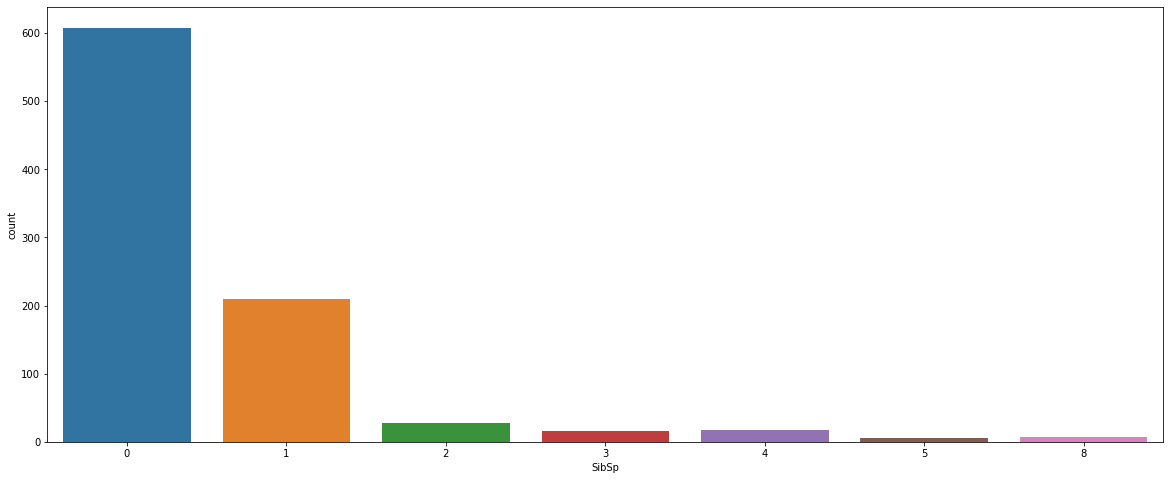

In [185]:
plt.figure(figsize=(20, 8))
sns.countplot(x = 'SibSp', data = df, )

<AxesSubplot:xlabel='Survived', ylabel='count'>

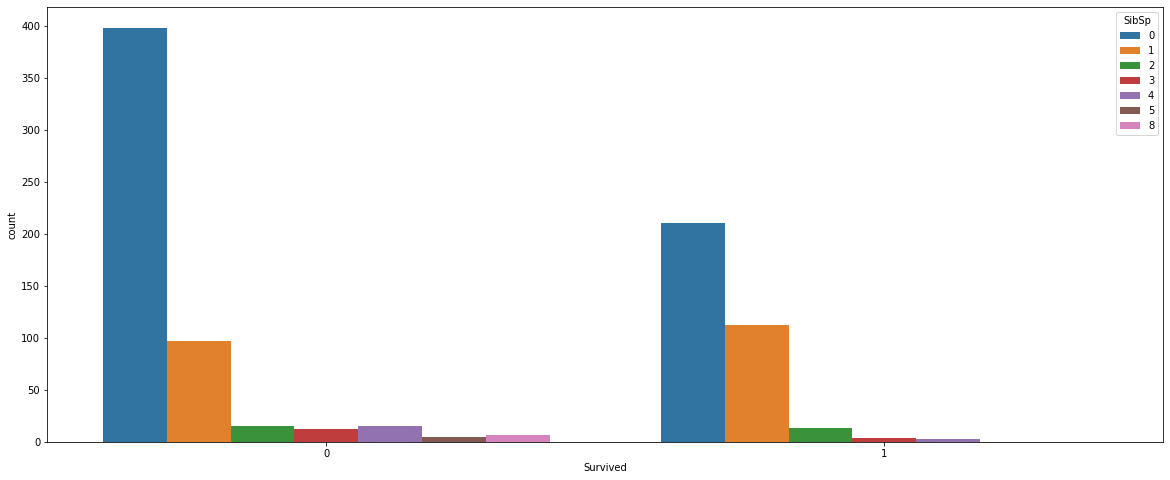

In [186]:
plt.figure(figsize=(20, 8))
sns.countplot(x = 'Survived', data = df, hue = 'SibSp')

In [199]:
df['with_without_family'] = df['SibSp'] + df['Parch']
df['with_without_family'] = df['with_without_family'].apply(lambda x: 0 if x == 0 else 1) 

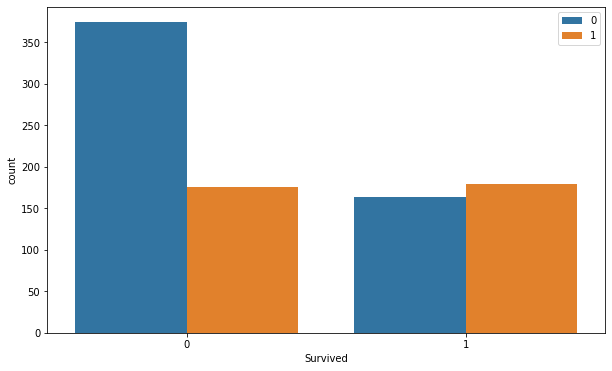

In [204]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Survived', data = df, hue = 'with_without_family')
plt.legend(loc = 'upper right')

In [214]:
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [8]:
def size_family(df):
    df['with_without_family'] = df['SibSp'] + df['Parch']
    df['with_without_family'] = df['with_without_family'].apply(lambda x: 0 if x == 0 else 1) 

    df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

    return df

In [20]:
size_family(df)

,PassengerId,Survived,Pclass,Age,Ticket,Fare,Cabin,Embarked,if_male,type_of_title,with_without_family
0,1,0,3,22.0,A/5 21171,7.2500,NaN,1.0,1,1,1
1,2,1,1,38.0,PC 17599,71.2833,C85,2.0,0,3,1
2,3,1,3,26.0,STON/O2. 3101282,7.9250,NaN,1.0,0,2,0
3,4,1,1,35.0,113803,53.1000,C123,1.0,0,3,1
4,5,0,3,35.0,373450,8.0500,NaN,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,211536,13.0000,NaN,1.0,1,0,0
887,888,1,1,19.0,112053,30.0000,B42,1.0,0,2,0
888,889,0,3,NaN,W./C. 6607,23.4500,NaN,1.0,0,2,1
889,890,1,1,26.0,111369,30.0000,C148,2.0,1,1,0


In [21]:
df.corr()['Survived']

PassengerId           -0.005007
Survived               1.000000
Pclass                -0.338481
Age                   -0.077221
Fare                   0.257307
Embarked               0.106811
if_male               -0.543351
type_of_title          0.451099
with_without_family    0.203367
Name: Survived, dtype: float64

## Cabin

In [237]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,2memb,t1,t2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,A/5,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),PC,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,STON/O2.,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),NaN,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,NaN,373450.0


In [238]:
df['Cabin'].isnull().sum()

687

In [239]:
df['New_cabin'] = df['Cabin'].astype(str).str[0]
df['New_cabin'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [240]:
df['New_cabin'] = df['New_cabin'].map({'n': 0, 'C': 1, "E": 2, "G": 3, "D": 4, 'A': 5, "B": 6, "F": 7, "T": 8})

<AxesSubplot:xlabel='New_cabin', ylabel='count'>

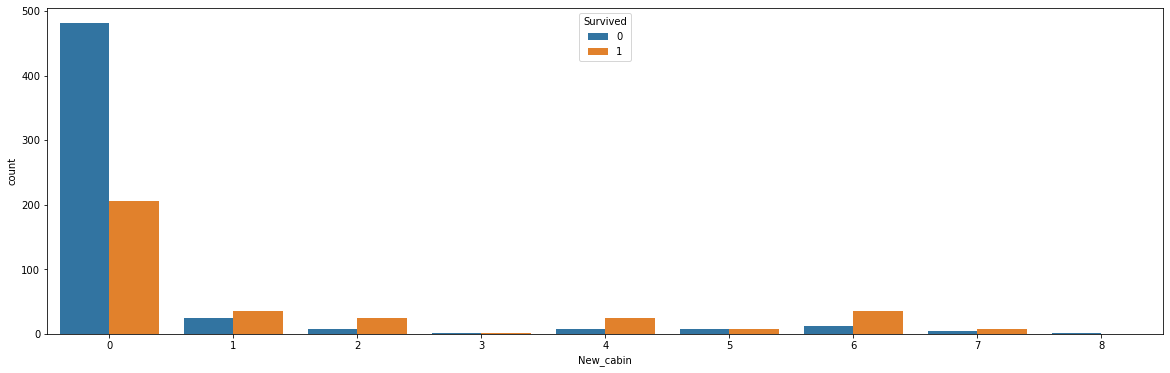

In [243]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'New_cabin', data = df, hue = 'Survived')

In [244]:
df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
New_cabin      0.270310
Name: Survived, dtype: float64

In [211]:
df.drop(['Cabin', 'New_cabin'], axis = 1, inplace = True)

In [9]:
def cabin(df):
    df['Cabin'] = df['Cabin'].astype(str).str[0]
    df['Cabin'] = df['Cabin'].map({'n': 0, 'C': 1, "E": 2, "G": 3, "D": 4, 'A': 5, "B": 6, "F": 7, "T": 8})
    return df

In [248]:
cabin(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,6,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C


## Ticket

In [216]:
df['Ticket'].sort_values(ascending = False)[:20]

745           WE/P 5735
540           WE/P 5735
219           W/C 14208
92          W.E.P. 5734
235          W./C. 6609
436          W./C. 6608
736          W./C. 6608
86           W./C. 6608
147          W./C. 6608
783          W./C. 6607
888          W./C. 6607
242         W./C. 14263
526         W./C. 14258
226           SW/PP 751
816    STON/O2. 3101290
216    STON/O2. 3101283
2      STON/O2. 3101282
142    STON/O2. 3101279
403    STON/O2. 3101279
729    STON/O2. 3101271
Name: Ticket, dtype: object

In [234]:
df["t1"] = np.nan
df["t2"] = np.nan
for i in range(len(df)):
    a = df['Ticket'][i].split(' ')
    #print(len(a))
    if len(a) == 2:
        df['t1'][i] = a[0]
        df['t2'][i] = a[1]
    elif len(a) == 1:
        df['t2'][i] = a[0]

<ipython-input-234-95d869742ec3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t1'][i] = a[0]
<ipython-input-234-95d869742ec3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t2'][i] = a[1]
<ipython-input-234-95d869742ec3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t2'][i] = a[0]


In [236]:
df[['Ticket', 't1', 't2']].head(50)

,Ticket,t1,t2
0,A/5 21171,A/5,21171.0
1,PC 17599,PC,17599.0
2,STON/O2. 3101282,STON/O2.,3101282.0
3,113803,NaN,113803.0
4,373450,NaN,373450.0
5,330877,NaN,330877.0
6,17463,NaN,17463.0
7,349909,NaN,349909.0
8,347742,NaN,347742.0
9,237736,NaN,237736.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,2memb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


## Summary

In [217]:
df.drop('Ticket', axis = 1, inplace = True)

In [15]:
def drop_fill_unecessary(df):
    df.drop(['Ticket'], axis = 1, inplace=True)
    df['Fare'].fillna(df["Fare"].median(), inplace = True)
    return df

In [101]:
drop_fill_unecessary(df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Surname,2memb,prefix,type_of_title,type_of_titlee
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Kelly,Mr. James,Mr,Mr,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Wilkes,Mrs. James (Ellen Needs),Mrs,Mrs,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Myles,Mr. Thomas Francis,Mr,Mr,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Wirz,Mr. Albert,Mr,Mr,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Hirvonen,Mrs. Alexander (Helga E Lindqvist),Mrs,Mrs,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,Spector,Mr. Woolf,Mr,Mr,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Oliva y Ocana,Dona. Fermina,Dona,Dona,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Saether,Mr. Simon Sivertsen,Mr,Mr,1.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,Ware,Mr. Frederick,Mr,Mr,1.0


In [25]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,if_male,type_of_title,with_without_family
0,1,0,3,22.0,7.2500,1.0,1,1,1
1,2,1,1,38.0,71.2833,2.0,0,3,1
2,3,1,3,26.0,7.9250,1.0,0,2,0
3,4,1,1,35.0,53.1000,1.0,0,3,1
4,5,0,3,35.0,8.0500,1.0,1,1,0


<AxesSubplot:>

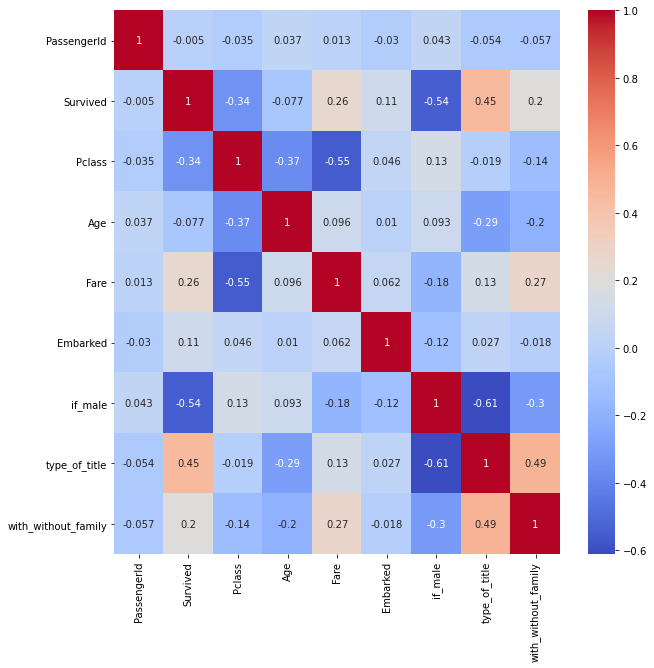

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

In [147]:
def feature_engineering(df):
    change_sex(df)
    fill_age(df)
    embarked(df)
    name_title(df)
    size_family(df)
    cabin(df)
    #df.drop('Cabin', axis = 1, inplace = True)
    drop_fill_unecessary(df)
    return(df)

## Sprawdzenie dla danych treningowych

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [104]:
df = pd.read_csv("train.csv")
feature_engineering(df)
df.set_index('PassengerId', inplace=True)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [172]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

C:\Users\adamz\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [64]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[138  16]
 [ 36  78]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.83      0.68      0.75       114

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

0.8059701492537313


In [62]:
cross_val_score(lr, X_train, y_train, cv = 3, scoring = 'accuracy')

C:\Users\adamz\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adamz\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

array([0.82211538, 0.81730769, 0.8115942 ])

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [26]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[138  16]
 [ 34  80]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       154
           1       0.83      0.70      0.76       114

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.81      0.81       268



In [47]:
from sklearn.linear_model import SGDClassifier

In [48]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [49]:
pred = sgd_clf.predict(X_test)

In [55]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [54]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[154   0]
 [114   0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       154
           1       0.00      0.00      0.00       114

    accuracy                           0.57       268
   macro avg       0.29      0.50      0.36       268
weighted avg       0.33      0.57      0.42       268



C:\Users\adamz\Anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamz\Anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamz\Anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
#All model

In [106]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def all_model(X_train, y_train, X_test, y_test):
    
    accuracy_list = []

    lr = LogisticRegression()
    nb = GaussianNB()
    sgd = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    dtree = DecisionTreeClassifier(max_depth=10, random_state=42, max_features=None, min_samples_split=15)
    rfm = RandomForestClassifier(random_state=42)
    svm = SVC(kernel='linear', random_state=42)

    name_list = [lr, nb, sgd, knn, dtree, rfm, svm]

    for name in name_list:
        name.fit(X_train, y_train)
        pred = name.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, pred))

    for i in range((len(accuracy_list))):
        print("Model: ", str(name_list[i]).split('(')[0])
        print("Accuracy score: ", accuracy_list[i])

In [107]:
all_model(X_train, y_train, X_test, y_test)

C:\Users\adamz\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  LogisticRegression
Accuracy score:  0.7798507462686567
Model:  GaussianNB
Accuracy score:  0.7350746268656716
Model:  SGDClassifier
Accuracy score:  0.6380597014925373
Model:  KNeighborsClassifier
Accuracy score:  0.7014925373134329
Model:  DecisionTreeClassifier
Accuracy score:  0.7835820895522388
Model:  RandomForestClassifier
Accuracy score:  0.8059701492537313
Model:  SVC
Accuracy score:  0.7649253731343284


In [86]:
# RandomForest

In [108]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [109]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [110]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [111]:
display(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 10}


0.79 + or -0.032 for the {'max_depth': 2, 'n_estimators': 5}
0.817 + or -0.04 for the {'max_depth': 2, 'n_estimators': 10}
0.803 + or -0.04 for the {'max_depth': 2, 'n_estimators': 50}
0.788 + or -0.04 for the {'max_depth': 2, 'n_estimators': 100}
0.79 + or -0.039 for the {'max_depth': 2, 'n_estimators': 250}
0.791 + or -0.048 for the {'max_depth': 4, 'n_estimators': 5}
0.804 + or -0.034 for the {'max_depth': 4, 'n_estimators': 10}
0.814 + or -0.041 for the {'max_depth': 4, 'n_estimators': 50}
0.817 + or -0.038 for the {'max_depth': 4, 'n_estimators': 100}
0.817 + or -0.038 for the {'max_depth': 4, 'n_estimators': 250}
0.791 + or -0.042 for the {'max_depth': 8, 'n_estimators': 5}
0.812 + or -0.032 for the {'max_depth': 8, 'n_estimators': 10}
0.822 + or -0.032 for the {'max_depth': 8, 'n_estimators': 50}
0.817 + or -0.035 for the {'max_depth': 8, 'n_estimators': 100}
0.819 + or -0.038 for the {'max_depth': 8, 'n_estimators': 2

In [112]:
rfc = RandomForestClassifier(max_depth=16, n_estimators=10)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(round(accuracy_score(y_test, pred),2))

[[137  17]
 [ 31  83]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       154
           1       0.83      0.73      0.78       114

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

0.82


## Uczenie i zapisanie wyników

In [141]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv("train.csv")
feature_engineering(df_test)
df_test.set_index('PassengerId', inplace=True)
feature_engineering(df_train)
df_train.set_index('PassengerId', inplace=True)

X_train = df_train.drop('Survived', axis = 1)
y_train = df_train['Survived']

In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [189]:
scaler1 = StandardScaler()
sX_train = scaler1.fit_transform(X_train)
scaler2 = StandardScaler()
sX_test = scaler2.fit_transform(df_test)

In [190]:
lr = LogisticRegression()
lr.fit(sX_train,y_train)
predictions = lr.predict(sX_test)

In [142]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [143]:
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 50}


0.805 + or -0.015 for the {'max_depth': 2, 'n_estimators': 5}
0.768 + or -0.039 for the {'max_depth': 2, 'n_estimators': 10}
0.795 + or -0.022 for the {'max_depth': 2, 'n_estimators': 50}
0.798 + or -0.023 for the {'max_depth': 2, 'n_estimators': 100}
0.798 + or -0.021 for the {'max_depth': 2, 'n_estimators': 250}
0.807 + or -0.019 for the {'max_depth': 4, 'n_estimators': 5}
0.815 + or -0.014 for the {'max_depth': 4, 'n_estimators': 10}
0.819 + or -0.008 for the {'max_depth': 4, 'n_estimators': 50}
0.817 + or -0.015 for the {'max_depth': 4, 'n_estimators': 100}
0.82 + or -0.013 for the {'max_depth': 4, 'n_estimators': 250}
0.819 + or -0.025 for the {'max_depth': 8, 'n_estimators': 5}
0.822 + or -0.013 for the {'max_depth': 8, 'n_estimators': 10}
0.833 + or -0.019 for the {'max_depth': 8, 'n_estimators': 50}
0.832 + or -0.025 for the {'max_depth': 8, 'n_estimators': 100}
0.825 + or -0.024 for the {'max_depth': 8, 'n_estimators'

In [144]:
rfc = RandomForestClassifier(max_depth=8, n_estimators=50)
rfc.fit(X_train, y_train)
predictions = rfc.predict(df_test)

In [145]:
def save_submission(val, pred):
    gs = pd.read_csv('gender_submission.csv')
    gs.drop('Survived', axis = 1, inplace = True)
    gs['Survived'] = pred
    gs.set_index('PassengerId', inplace =  True)
    gs.to_csv('submission{}.csv'.format(val))

In [146]:
save_submission(2, predictions)